In [ ]:
# Question - 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import DBSCAN

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [ ]:
labels = dbscan.labels_

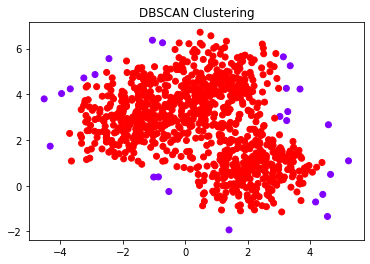

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

Text(0.5, 1.0, 'Scattered data')

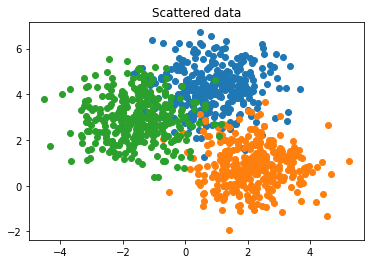

In [ ]:
# Question - 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.title("Scattered data")

In [ ]:
def check_core_point(eps,minPts, df, index):
    x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']
    temp =  df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]

    if len(temp) >= minPts:
        return (temp.index , True, False, False)

    elif (len(temp) < minPts) and len(temp) > 0:
        return (temp.index , False, True, False)

    elif len(temp) == 0:
        return (temp.index , False, False, True)

def cluster_with_stack(eps, minPts, df):

    C = 1
    current_stack = set()
    unvisited = list(df.index)
    clusters = []

    while (len(unvisited) != 0):
        first_point = True
        current_stack.add(random.choice(unvisited))

        while len(current_stack) != 0:

            curr_idx = current_stack.pop()
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)

            if (isborder & first_point):
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]
                continue

            unvisited.remove(curr_idx) #remove point from unvisited list

            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points

            if iscore:
                first_point = False

                clusters.append((curr_idx,C))
                current_stack.update(neigh_indexes)

            elif isborder:
                clusters.append((curr_idx,C))

                continue

            elif isnoise:
                clusters.append((curr_idx, 0))

                continue

        if not first_point:
            C+=1

    return clusters

Text(0, 0.5, 'Y')

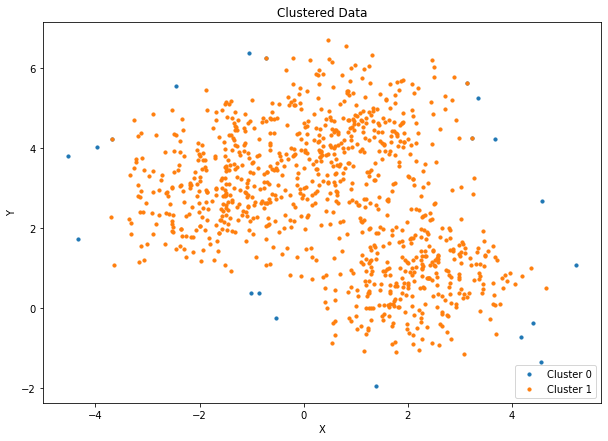

In [ ]:
import random
eps = 0.5
minPts = 5

data = pd.DataFrame(X, columns = ["X", "Y"] )
clustered = cluster_with_stack(eps, minPts, data)

idx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

plt.figure(figsize=(10,7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')